In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import date

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
match_file = "/content/gdrive/My Drive/ml_project1/IPL Matches 2008-2020.csv"
ball_file ="/content/gdrive/My Drive/ml_project1/IPL Ball-by-Ball 2008-2020 2.csv"

### Ball-file Preprocessing

In [ ]:
pd.read_csv(match_file)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi


In [ ]:
ball = pd.read_csv(ball_file)
ball[:50]

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
5,335982,1,7,4,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
6,335982,1,7,5,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
7,335982,1,7,6,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
8,335982,1,8,1,BB McCullum,RT Ponting,JH Kallis,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
9,335982,1,8,2,BB McCullum,RT Ponting,JH Kallis,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [ ]:
#caught and bowled mein bowler ko dena hai
#bowler ko dena hai
#david warner, kane williamson, hazelwood

In [ ]:
ball['dismissal_kind'].value_counts()

caught                   5743
bowled                   1700
run out                   893
lbw                       571
stumped                   294
caught and bowled         269
hit wicket                 12
retired hurt               11
obstructing the field       2
Name: dismissal_kind, dtype: int64

In [ ]:
ball.loc[ball['dismissal_kind'] == 'stumped']

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
753,335985,1,16,5,RV Uthappa,AM Nayar,B Akhil,0,0,0,0,1,stumped,RV Uthappa,MV Boucher,NaN,Mumbai Indians,Royal Challengers Bangalore
1302,335987,1,7,4,DPMD Jayawardene,JR Hopes,D Salunkhe,0,0,0,0,1,stumped,DPMD Jayawardene,Kamran Akmal,NaN,Kings XI Punjab,Rajasthan Royals
1890,335990,1,2,2,AC Gilchrist,VVS Laxman,YK Pathan,0,0,0,0,1,stumped,AC Gilchrist,Kamran Akmal,NaN,Deccan Chargers,Rajasthan Royals
4820,336002,1,11,2,HH Gibbs,AC Gilchrist,A Kumble,0,0,0,0,1,stumped,HH Gibbs,SP Goswami,NaN,Deccan Chargers,Royal Challengers Bangalore
5004,336003,1,8,6,Yuvraj Singh,SE Marsh,Mohammad Hafeez,0,0,0,0,1,stumped,Yuvraj Singh,WP Saha,NaN,Kings XI Punjab,Kolkata Knight Riders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181567,1216502,2,10,6,WP Saha,KS Williamson,YS Chahal,0,0,0,0,1,stumped,WP Saha,AB de Villiers,NaN,Sunrisers Hyderabad,Royal Challengers Bangalore
183059,1216508,2,19,6,Shivam Mavi,Kuldeep Yadav,RD Chahar,0,0,0,0,1,stumped,Shivam Mavi,Q de Kock,NaN,Kolkata Knight Riders,Mumbai Indians
185979,1216521,1,8,5,DL Chahar,SM Curran,RD Chahar,0,0,0,0,1,stumped,DL Chahar,Q de Kock,NaN,Chennai Super Kings,Mumbai Indians
189456,1216535,1,10,2,SS Iyer,RR Pant,RD Chahar,0,0,0,0,1,stumped,SS Iyer,Q de Kock,NaN,Delhi Capitals,Mumbai Indians


In [ ]:
points

In [ ]:
name = max(points)
print(points[name])

{'DL Chahar': 270.5, 'PA Patel': 175.0, 'Imran Tahir': 244.5, 'RA Jadeja': 230.5, 'DJ Bravo': 154.5, 'KM Jadhav': 68.0, 'YS Chahal': 183.5, 'NA Saini': 184.5, 'AT Rayudu': 89.5, 'MM Ali': 189.5, 'Harbhajan Singh': 184.5, 'SK Raina': 162.5, 'SR Watson': 190.0, 'C de Grandhomme': 21.5, 'MS Dhoni': 175.5, 'UT Yadav': 139.5, 'S Dube': 18.5, 'Mohammed Siraj': 100.0, 'M Prasidh Krishna': 107.0, 'PP Chawla': 146.0, 'DA Warner': 221.0, 'JM Bairstow': 210.5, 'LH Ferguson': 35.0, 'B Kumar': 224.5, 'Shakib Al Hasan': 29.0, 'CA Lynn': 182.0, 'Rashid Khan': 248.5, 'N Rana': 173.0, 'RV Uthappa': 115.0, 'Sandeep Sharma': 129.5, 'SP Narine': 202.5, 'Kuldeep Yadav': 79.0, 'AD Russell': 368.0, 'V Shankar': 115.5, 'MK Pandey': 123.5, 'S Kaul': 78.5, 'Shubman Gill': 105.0, 'TA Boult': 70.0, 'I Sharma': 170.5, 'Q de Kock': 247.5, 'RG Sharma': 175.0, 'K Rabada': 221.0, 'R Tewatia': 49.5, 'RR Pant': 247.0, 'Rasikh Salam': 10.5, 'MJ McClenaghan': 59.5, 'PP Shaw': 149.0, 'SS Iyer': 171.5, 'KA Pollard': 132.0, 

In [ ]:
ball['is_wicket'].value_counts()

0    183973
1      9495
Name: is_wicket, dtype: int64

In [ ]:
ball['batsman_runs'].value_counts()

0    77637
1    71937
4    21908
2    12408
6     8902
3      616
5       60
Name: batsman_runs, dtype: int64

In [ ]:
print("Number of null values for each column")
ball.isnull().sum()

Number of null values for each column


id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

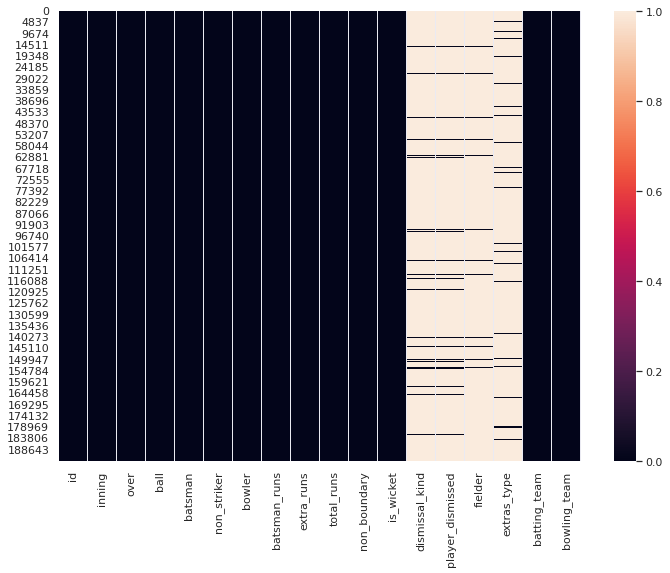

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(ball.isnull())

In [ ]:
ball.describe()

,id,inning,over,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket
count,1.934680e+05,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000
mean,7.567688e+05,1.482131,9.177027,3.615967,1.240231,0.066414,1.306645,0.000083,0.049078
std,3.060971e+05,0.499682,5.676848,1.807128,1.610867,0.339991,1.598802,0.009094,0.216031
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.012270e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.292970e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.082628e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.237181e+06,2.000000,19.000000,9.000000,6.000000,7.000000,7.000000,1.000000,1.000000


In [ ]:
ball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [ ]:
ball[ball['dismissal_kind'] == 0]

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team


In [ ]:
ball_filtered = ball[ball['dismissal_kind'] != 0]

In [ ]:
ball_filtered

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193464,1237181,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193465,1237181,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,NaN,NaN,NaN,wides,Delhi Capitals,Mumbai Indians
193466,1237181,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians


In [ ]:
compression_opts = dict(method='zip',
                        archive_name='out.csv')  
ball_filtered.to_csv('out.zip', index=False,
          compression=compression_opts)  

In [ ]:
m = ball.bowling_team.isnull()
np.where(m, func(m), ball.bowling_team)

NameError: ignored

In [ ]:
def func(x):
  print(type(x))
  return 'women'

m = ball.bowling_team.isnull()
ball['bowling_team'] = np.where(m, func(m), ball.bowling_team)


In [ ]:
print("Number of null values for each column")
ball.isnull().sum()

We see that there are 191 missing values in bowling team columns

In [ ]:
ball[ball['bowling_team'].isnull()]

#### For each missing bowling team value in bowl dataset, compare the match id with match dataset and fill in the values.  

In [ ]:
for index,row in ball.iterrows():
  #try:
    if ball['bowling_team'].isnull():
      id = row['id']
      team1 = matches[matches['id']==id]['team1']
      team2 = matches[matches['id']==id]['team2']
      
      if row['batting_team']==team1:
        print("team1")
      elif row['batting_team']==team2:
        print("t2")
      else:
        print("non")
  #except:
    #print(row['bowling_team'])


In [ ]:
st = set(ball[ball['bowling_team'].isnull()]['id'].tolist())

In [ ]:
ball['bowling_team'] = df.groupby('Title').transform(lambda group: group.fillna(group.mean()))

In [ ]:
dicT1 = {}
dicT2 = {}
for index,row in matches.iterrows():
  dicT1[row['id']] = row['team1']
  dicT2[row['id']] = row['team2']
print(dic)

In [ ]:
for index,row in ball.iterrows():
  
  if row['id'] in st:
    #print(row['bowling_team'])
    id = row['id']
    team1 = dicT1[id]
    team2 = dicT2[id]
    
    
    #print(row['batting_team'])
    #print(type(row['batting_team']))
    #print()

    #print(team1.name)
    #pprint(vars(team1))

    # for property, value in vars(team1).items():
    #   print(property, ":", value)
    if row['batting_team']==team1:
      ball[index]['bowling_team']=team2
    elif row['batting_team']==team2:
      ball[index]['bowling_team']=team1

In [ ]:
ball.bowling_team=ball.bowling_team.fillna(df.title.str.contains('lip').replace(True,'women'))
id_team.loc[id_team['id'] == 501265]['team1']

In [ ]:
id_team = matches[['id', 'team1','team2']]

In [ ]:
id_team.loc[id_team['id'] == 501265]['team1']

In [ ]:
matches[matches['id']==335982]


In [ ]:
print(type(id_team['team1']))

In [ ]:
df2[df2['id']==501265]	

### Match-file Preprocessing


In [ ]:
matches = pd.read_csv(match_file)
matches

In [ ]:
import re

In [ ]:
matches['date'] = pd.to_datetime(matches['date']).dt.date

In [ ]:
def retpos(ids):
  points={}
  lst=['bowled','run out','lbw','stumped','caught','caught and bowled','hit wicket']
  for index, row in ball.iterrows():
    if row['id'] in ids:
      if row['batsman_runs']==4:
        try:
          points[row['batsman']]+=2.5
        except:
          points[row['batsman']]=2.5
      
      elif row['batsman_runs']==6:
        try:
          points[row['batsman']]+=3.5
        except:
          points[row['batsman']]=3.5

      if row['total_runs']==0:
        try:
          points[row['bowler']]+=1
        except:
          points[row['bowler']]=1

      if row['dismissal_kind']=='caught' or row['dismissal_kind']=='stumped':
        try:
          points[row['fielder']]+=2.5
        except:
          points[row['fielder']]=2.5
      
      if row['dismissal_kind'] in lst:
        try:
          points[row['bowler']]+=3.5
        except:
          points[row['bowler']]=3.5
  return points    

In [ ]:
match_dfs={}
for yr in range(2008, 2020):
  b2 = date(yr, 12, 31)
  b1 = date(yr-1, 12, 31)
  match_dfs[yr]=matches.loc[((matches['date']>b1) & (matches['date']<=b2))]

In [ ]:
list(match_dfs[2008]['id'])

In [ ]:
points={}
for yr in match_dfs.keys():
  id_lst = list(match_dfs[yr]['id'])
  points[yr] = retpos(id_lst)

In [ ]:
points[2009]

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
player_dict={}
#player_dict['jahnvi':[2008:20, 2009:30.5, 2010:56]]
for yr in points:
  for player in points[yr].keys():
    try:
      player_dict[player][yr]=points[yr][player]
    except:
      player_dict[player]={}
      player_dict[player][yr]=points[yr][player]

In [ ]:
player_dict['S Dhawan']

In [ ]:
import matplotlib.pyplot as plt
X = np.array(list(player_dict['S Dhawan'].keys())).reshape(1, -1)
Y = np.array(list(player_dict['S Dhawan'].values())).reshape(1, -1)
print(X)
print(Y)
linear_regressor = LinearRegression()  
linear_regressor.fit(X,Y)
Y_pred = linear_regressor.predict(X)

plt.scatter(X, Y)
plt.plot(X[0], Y_pred[0], color='red')
plt.show()

In [ ]:
x = np.array(list(player_dict['S Dhawan'].keys()))
y = np.array(list(player_dict['S Dhawan'].values()))

In [ ]:
m, b = np.polyfit(x, y, 1)
print(m)
plt.plot(x, y, 'o')
plt.plot(x, m*x + b, color='red')
plt.title("Shikhar Dhawan's performance over 12 years")
plt.show()

In [ ]:
Y_pred[0]

In [ ]:
X[0]

In [ ]:
plt.plot(X[0], Y_pred[0], color='red')
plt.show()

In [ ]:
matches.info()

In [ ]:
exp = matches.loc[matches['date'] == '2020-11-10']

In [ ]:
print(exp)
exp['date'] = pd.to_datetime(exp['date']).dt.date

In [ ]:
exp['date']

In [ ]:
exp.info()

In [ ]:
print("Number of null values for each column")
matches.isnull().sum()

In [ ]:
matches.info()

In [ ]:
matches_f = matches.loc[matches['result_margin'].notnull()]
matches_f.isnull().sum()

In [ ]:
name = matches_f['id']
price = matches_f['result_margin']
 
# Figure Size
fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(name, price)
 
# Show Plot
plt.show()

In [ ]:
def plot_it(dic, xlab, ylab, col, step):
  data = dic
  courses = list(data.keys())
  values = list(data.values())
    
  fig = plt.figure(figsize = (20, 5))
  lis = [i for i in range(0,150,step)] 
  # creating the bar plot
  plt.bar(courses, values, color =col)
  
  plt.xlabel(xlab)
  plt.ylabel(ylab)
  plt.title("Only plain")
  plt.axes().set_xticks(lis)
  plt.show()

In [ ]:
sns.distplot(matches_f['result_margin'])

In [ ]:
matches.corr(method='pearson')

In [ ]:
matches.corr()

In [ ]:
ball.corr()

In [ ]:
sns.set(rc={'figure.figsize':(11.7*2,8.27*2)})

tmp = matches.drop('id', axis=1)
g = sns.pairplot(tmp, hue='winner', markers='+')
plt.show()

In [ ]:
tmp = ball.drop('id', axis=1)
g = sns.pairplot(tmp, hue='winner', markers='+')
plt.show()

In [ ]:
#matches_f.plot.scatter('result_margin')
import matplotlib.pyplot as plt
plt.scatter(matches_f['result_margin'])

In [ ]:
matches_filtered = matches[matches['result_margin']]

In [ ]:
matches[matches.winner.isnull()]

In [ ]:
matches.info()

In [ ]:
sns.heatmap(matches.isnull())

In [ ]:
matches.describe()

### Other

In [ ]:
df_filtered

In [ ]:
matches

In [ ]:
st = set(matches['method'].tolist())
print(st)
matches['method'].value_counts()
# There are only 19 out of 816 entries which contain a non-null value of D/L in method column. Since Duckworth Lewis means 
# the match was interrupted by unforeseen events and the victory was decided based on some formulas. Hence dropping the matches itself. 

In [ ]:
matches_new = matches[matches['method'] != 'D/L']
matches_new = matches_new.drop(columns=['method'])
matches = matches_new

In [ ]:
st = set(matches['eliminator'].tolist())
print(st)
matches['eliminator'].value_counts()
matches_new = matches_new.drop(columns=['eliminator'])
matches = matches_new

In [ ]:
for index, row in df2.iterrows():
  if row['method']=='D/L':
    print(row)

In [ ]:
df_filtered

In [ ]:
df_filtered.to_csv('file.csv')

In [ ]:
df3.to_csv('Matches_clean.csv')